# Single node modeling example
We set up a 2D isotropic acoustic modeling operator for a single shot with the source located in the center of the model, and receivers located in a fixed array across the top of the model. 

In [1]:
using PyPlot, WaveFD, JetPackWaveFD, Random

## Define the model 
Even though this is a 2D example, the model passed to the nonlinear operator below is 3D, with size [nz,nx,1] for the velocity only case. In the case of variable density acoustics, the model would be of size [nz,nx,2]. 

In [2]:
v = read!("../20_marmousi_model_setup/marmousi_vp_20m_176x851.bin", Array{Float32}(undef,176,851));
dz,dx = 20.0,20.0
nz,nx = size(v)
m = reshape(v, (nz,nx,1))
@show dz,dx
@show size(v)
@show size(m);

(dz, dx) = (20.0, 20.0)
size(v) = (176, 851)
size(m) = (176, 851, 1)


## Note on scratch space for temporary files
When dealing with serialized nonlinear wavefields as in this example, we need to specify the location where scratch files will be written.

You may need to change this to point to a temporary directory available on your system.

In [3]:
scratch = "/mnt/scratch"
@assert isdir(scratch)

In [4]:
F = JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
    b = ones(Float32,size(v)),
    nthreads = Sys.CPU_THREADS,
    isinterior = true,
    ntrec = 1601,
    dtrec = 0.004,
    dtmod = 0.002,
    dz = dz,
    dx = dx,
    wavelet = WaveletCausalRicker(f=5.0),
    sx = dx*(nx/2),
    sz = dz,
    rx = dx*[0:0.5:nx-1;],
    rz = 2*dz*ones(length(0:0.5:nx-1)),
    srcfieldfile = joinpath(scratch, "field-$(randstring()).bin"),
    reportinterval=1000)

"Jet nonlinear operator, (176, 851, 1) → (1601, 1701)"

In [5]:
d = F*m;

┌ Info: nonlinear forward on cbox-HC44rs2, srcfieldfile=/mnt/scratch/field-3pCe4hbL.bin
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:472
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  1000 of  3201  122.28 MCells/s (IO=37.61, EX=38.96, PR=20.23) -- rms d,p; 1.3120e+00 9.1300e-01
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:863
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  2000 of  3201  117.90 MCells/s (IO=36.54, EX=33.59, PR=20.05) -- rms d,p; 1.4652e+00 3.8945e-01
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:863
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  3000 of  3201  122.55 MCells/s (IO=37.97, EX=33.61, PR=21.05) -- rms d,p; 1.5127e+00 1.3791e-01
└ @ JetPackWaveFD /home/cvx/.julia/dev/JetPackWaveFD/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:863
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear 

In [6]:
# close the modeling operator, to remove seriliazation files
close(F)

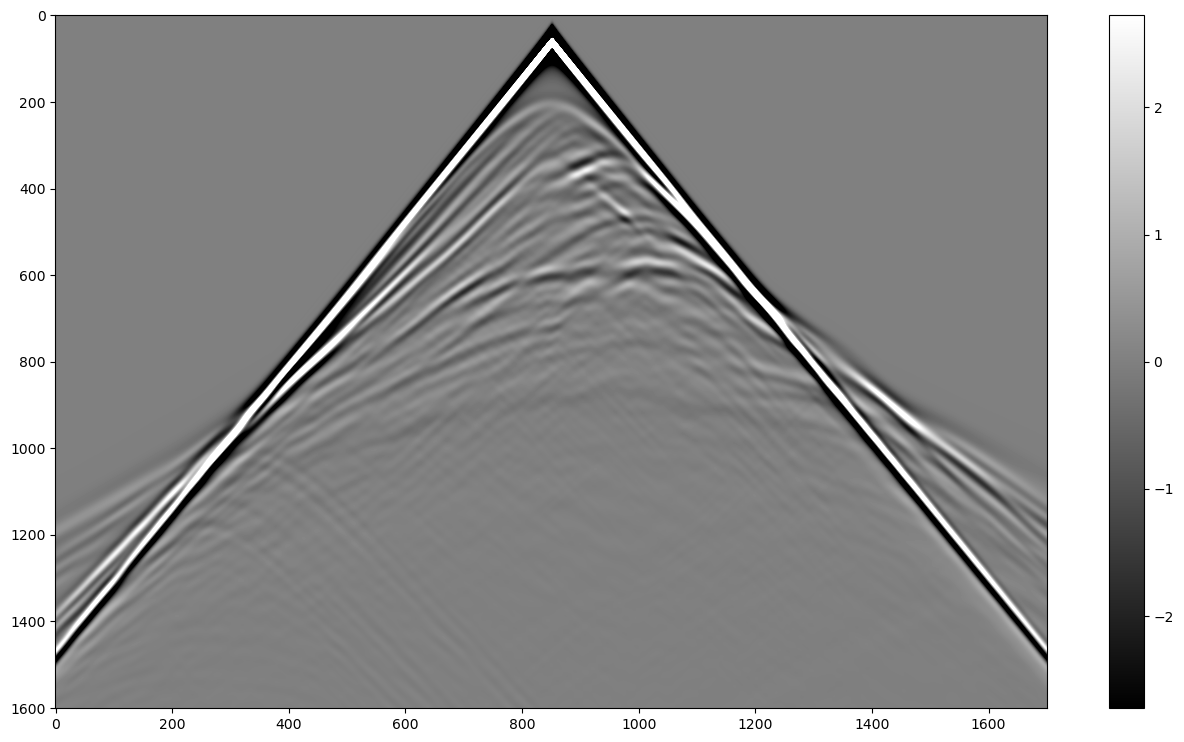

In [7]:
figure(figsize=(16,9)); clf()
imshow(d,aspect="auto", cmap="gray")
dmax = maximum(abs, d)
clim(0.025 .* [-dmax,+dmax])
colorbar();